# 使用Scikit-Learn 完成預測
### Scikit-Learn在三個面向提供支援。
1. 獲取資料:***klearn.datasets***
2. 掌握資料:***sklearn.preprocessing*** 
3. 機器學習:***sklearn Estimator API*** 

獲取資料的方式有很多種（包含檔案、資料庫、網路爬蟲、Kaggle Datasets等），<br>
其中最簡單的方式是從Sklearn import 內建的資料庫。由於其特性隨手可得且不用下載，所以我們通常叫他**玩具資料**：

# 基本架構

* 讀取資料&pre-processing
* 切分訓練集與測試集 
* 模型配適
* 預測 
* 評估(計算成績可能是誤差值或正確率或..)


In [4]:
%matplotlib inline

from sklearn import datasets
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


## 讀取Iris資料集與資料前處理

Iris Flowers 資料集

我們在這個項目中使用 Iris Data Set，這個資料集中的每個樣本有4個特徵，1個類別。該資料集1中的樣本類別數為3類，每類樣本數目為50個，總共150個樣本。

屬性資訊：

    花萼長度 sepal length(cm)
    花萼寬度 sepal width(cm)
    花瓣長度 petal length(cm)
    花瓣寬度 petal width(cm)
    類別：
        Iris Setosa
        Iris Versicolour
        Iris Virginica

樣本特徵資料是數值型的，而且單位都相同（釐米）。

![Iris Flowers](images/iris_data.PNG)


In [8]:
# load the iris dataset
iris = datasets.load_iris()
print(iris.DESCR)

.. _iris_dataset:

Iris plants dataset
--------------------

**Data Set Characteristics:**

:Number of Instances: 150 (50 in each of three classes)
:Number of Attributes: 4 numeric, predictive attributes and the class
:Attribute Information:
    - sepal length in cm
    - sepal width in cm
    - petal length in cm
    - petal width in cm
    - class:
            - Iris-Setosa
            - Iris-Versicolour
            - Iris-Virginica

:Summary Statistics:

============== ==== ==== ======= ===== ====================
                Min  Max   Mean    SD   Class Correlation
============== ==== ==== ======= ===== ====================
sepal length:   4.3  7.9   5.84   0.83    0.7826
sepal width:    2.0  4.4   3.05   0.43   -0.4194
petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)
petal width:    0.1  2.5   1.20   0.76    0.9565  (high!)
============== ==== ==== ======= ===== ====================

:Missing Attribute Values: None
:Class Distribution: 33.3% for each of 3 classes.
:Cr

* 印出iris的key值與檔案位置
* 查看前10筆資料
* 查看資料型別
* 印出標註的樣本類別資料

In [12]:
print(iris.keys())
print(iris['filename'])
print(iris.data[0:10])
print(type(iris.data))
print(iris.target_names)
print(iris.target)


dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename', 'data_module'])
iris.csv
[[5.1 3.5 1.4 0.2]
 [4.9 3.  1.4 0.2]
 [4.7 3.2 1.3 0.2]
 [4.6 3.1 1.5 0.2]
 [5.  3.6 1.4 0.2]
 [5.4 3.9 1.7 0.4]
 [4.6 3.4 1.4 0.3]
 [5.  3.4 1.5 0.2]
 [4.4 2.9 1.4 0.2]
 [4.9 3.1 1.5 0.1]]
<class 'numpy.ndarray'>
['setosa' 'versicolor' 'virginica']
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2]


In [14]:
# we only take the first two features. 
X = iris.data[:, :2]
print(X.shape)
Y = iris.target
print(Y.shape)

(150, 2)
(150,)


In [24]:
#以下是組成 pandas DataFrame (也可以不用這種做)
x = pd.DataFrame(iris.data, columns=iris['feature_names'])
x.head(10)

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
5,5.4,3.9,1.7,0.4
6,4.6,3.4,1.4,0.3
7,5.0,3.4,1.5,0.2
8,4.4,2.9,1.4,0.2
9,4.9,3.1,1.5,0.1


In [25]:
print(f'target_names: {iris.target_names}')

target_names: ['setosa' 'versicolor' 'virginica']


In [26]:
#建立Target欄位與資料
y = pd.DataFrame(iris.target, columns=['target'])
y.head()

,target
0,0
1,0
2,0
3,0
4,0


In [29]:
#合併資料特徵欄位與目標欄位
iris_data = pd.concat([x, y], axis=1)
iris_data = iris_data[['sepal length (cm)', 'petal length (cm)', 'target']]
iris_data.head(10)

,sepal length (cm),petal length (cm),target
0,5.1,1.4,0
1,4.9,1.4,0
2,4.7,1.3,0
3,4.6,1.5,0
4,5.0,1.4,0
5,5.4,1.7,0
6,4.6,1.4,0
7,5.0,1.5,0
8,4.4,1.4,0
9,4.9,1.5,0


In [32]:
#只選擇目標為0與1的資料
iris_data = iris_data[iris_data['target'].isin([0, 1])]
iris_data
# print(iris_data.shape)

,sepal length (cm),petal length (cm),target
0,5.1,1.4,0
1,4.9,1.4,0
2,4.7,1.3,0
3,4.6,1.5,0
4,5.0,1.4,0
...,...,...,...
95,5.7,4.2,1
96,5.7,4.2,1
97,6.2,4.3,1
98,5.1,3.0,1


## 切分訓練集與測試集
> train_test_split()

In [108]:
from sklearn.model_selection import train_test_split
X = iris_data[['sepal length (cm)', 'petal length (cm)']]
Y = iris_data['target']
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2)


In [109]:
X_train.head()


,sepal length (cm),petal length (cm)
21,5.1,1.5
16,5.4,1.3
39,5.1,1.5
17,5.1,1.4
59,5.2,3.9


In [110]:
X_test.head()
X_test.shape

(20, 2)

In [111]:
print(Y_train.shape)
Y_train.head()

(80,)


21    0
16    0
39    0
17    0
59    1
Name: target, dtype: int64

# Appendix 

>normalization和standardization是差不多的<br>
都是把數據進行前處理，從而使數值都落入到統一的數值範圍，從而在建模過程中，各個特徵量沒差別對待。<br> 
* normalization一般是把數據限定在需要的範圍，比如一般都是【0，1】，從而消除了數據量綱對建模的影響。<br> 
* standardization 一般是指將數據正態化，使平均值0方差為1.<br> 

因此normalization和standardization 是針對數據而言的，消除一些數值差異帶來的特種重要性偏見。<br>
經過歸一化的數據，能加快訓練速度，促進算法的收斂。

### Standardization (z-score)
    to compute the mean and standard deviation on a training set so as to be able to later reapply the same transformation on the testing set. 

In [112]:
def norm_stats(dfs):
    minimum = dfs.min()
    maximum = dfs.max()
    mu = dfs.mean()
    sigma = dfs.std()
    return (minimum, maximum, mu, sigma)


def z_score(col, stats):
    m, M, mu, s = stats
    df = pd.DataFrame()
    for c in col.columns:
        df[c] = (col[c]-mu[c])/s[c]
    return df

In [122]:
stats = norm_stats(X_train)
print(stats)
arr_x_train = np.array(z_score(X_train, stats))
arr_y_train = np.array(Y_train)
print(arr_x_train[:5])
print(arr_y_train[:5])
print('mean of X_train_std:',np.round(arr_x_train.mean(),4))
print('std of X_train_std:',arr_x_train.std())


(sepal length (cm)    4.3
petal length (cm)    1.0
dtype: float64, sepal length (cm)    7.0
petal length (cm)    5.1
dtype: float64, sepal length (cm)    5.49375
petal length (cm)    2.91750
dtype: float64, sepal length (cm)    0.636912
petal length (cm)    1.468296
dtype: float64)
[[-0.61821746 -0.96540496]
 [-0.14719463 -1.1016173 ]
 [-0.61821746 -0.96540496]
 [-0.61821746 -1.03351113]
 [-0.46120985  0.66914312]]
[0 0 0 0 1]
mean of X_train_std: -0.0
std of X_train_std: 0.9937303457175893


## use sklearn

In [116]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler().fit(X_train)  # Compute the statistics to be used for later scaling.
print(sc.mean_)  # mean
print(sc.scale_) # standard deviation

[5.49375 2.9175 ]
[0.63291859 1.45909004]


In [117]:
#transform: (x-u)/std.
X_train_std = sc.transform(X_train)
X_train_std[:5]

array([[-0.62211793, -0.9714959 ],
       [-0.14812332, -1.10856764],
       [-0.62211793, -0.9714959 ],
       [-0.62211793, -1.04003177],
       [-0.46411972,  0.67336489]])

The scaler instance can then be used on new data to transform it the same way it did on the training set:

In [118]:
X_test_std = sc.transform(X_test)
print(X_test_std[:10])

[[ 1.74785513  1.01604422]
 [ 0.00987489  0.53629315]
 [ 0.00987489 -1.04003177]
 [-0.78011613  0.39922142]
 [ 0.00987489  0.74190075]
 [ 0.4838695   0.81043662]
 [-1.72810536 -1.10856764]
 [-1.72810536 -1.04003177]
 [-0.14812332 -0.9714959 ]
 [-0.78011613 -1.1771035 ]]


you can also use fit_transform method (i.e., fit and then transform)    

In [119]:
X_train_std = sc.fit_transform(X_train)  
X_test_std = sc.fit_transform(X_test)
print(X_train_std[:10])


[[-0.62211793 -0.9714959 ]
 [-0.14812332 -1.10856764]
 [-0.62211793 -0.9714959 ]
 [-0.62211793 -1.04003177]
 [-0.46411972  0.67336489]
 [ 1.27386052  1.01604422]
 [-0.14812332 -0.83442417]
 [ 0.95786411  1.15311595]
 [-1.88610356 -1.24563937]
 [-0.14812332 -0.83442417]]


In [121]:
print('mean of X_train_std:',np.round(X_train_std.mean(),4))
print('std of X_train_std:',X_train_std.std())

mean of X_train_std: -0.0
std of X_train_std: 1.0


## Min-Max Normaliaztion
    Transforms features by scaling each feature to a given range.
    The transformation is given by:

    X' = X - X.min(axis=0) / ((X.max(axis=0) - X.min(axis=0))
    X -> N 維資料
    


49.892218636022974
30.046666022200725


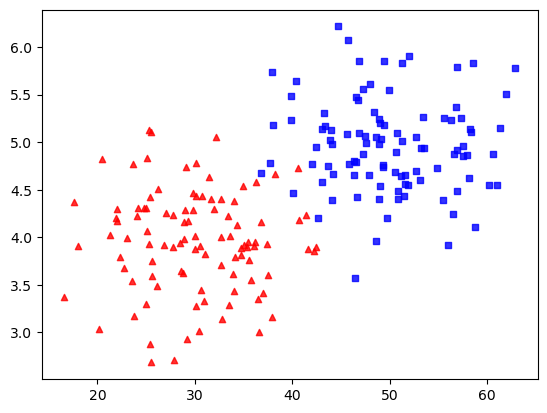

In [129]:
x1 = np.random.normal(50, 6, 100)  # np.random.normal(mu,sigma,size))
y1 = np.random.normal(5, 0.5, 100)

x2 = np.random.normal(30,6,100)
y2 = np.random.normal(4,0.5,100)
plt.scatter(x1,y1,c='b',marker='s',s=20,alpha=0.8)
plt.scatter(x2,y2,c='r', marker='^', s=20, alpha=0.8)

print(np.sum(x1)/len(x1))
print(np.sum(x2)/len(x2))

In [130]:
x_val = np.concatenate((x1,x2))
y_val = np.concatenate((y1,y2))

x_val.shape

(200,)

In [131]:
def minmax_norm(X):
    return (X - X.min(axis=0)) / ((X.max(axis=0) - X.min(axis=0)))

In [132]:
minmax_norm(x_val[:10])

array([1.        , 0.54518573, 0.51321115, 0.47976125, 0.55318386,
       0.06497031, 0.        , 0.41156953, 0.95365966, 0.21617988])

In [133]:
from sklearn.preprocessing import MinMaxScaler
print(x_val.shape)
x_val=x_val.reshape(-1, 1) # 1D array to 2D array
print(x_val.shape)
scaler = MinMaxScaler().fit(x_val)  # default range 0~1
print(scaler.data_max_)
print(scaler.transform(x_val)[:10])

(200,)
(200, 1)
[62.86673002]
[[1.        ]
 [0.7945063 ]
 [0.78005958]
 [0.76494628]
 [0.79812001]
 [0.57753589]
 [0.54818107]
 [0.73413597]
 [0.97906256]
 [0.64585523]]
